In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [2]:
data = pd.read_csv('bitcoin_data.csv')
data.reset_index()

,index,Date,High,Low,Last,Bid,Ask,Volume,VWAP
0,0,2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
1,1,2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2,2,2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
3,3,2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
4,4,2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22
...,...,...,...,...,...,...,...,...,...
2378,2378,2020-11-14,16494.52,15970.33,16335.58,16335.58,16339.27,7842.488826,16279.18
2379,2379,2020-11-15,16341.89,15715.10,16086.34,16087.77,16094.81,5046.326705,15982.98
2380,2380,2020-11-16,16170.00,15786.46,15975.49,15969.41,15973.22,3226.276565,15979.39
2381,2381,2020-11-17,16894.93,15875.50,16724.62,16719.84,16729.63,7511.143605,16409.99


In [3]:
data = data.drop(columns='Date')


In [4]:
test = data.tail(20)
test

,High,Low,Last,Bid,Ask,Volume,VWAP
2363,13650.00,12993.00,13411.86,13413.35,13416.39,8948.197381,13318.04
2364,13675.56,13129.26,13577.60,13572.18,13581.82,8980.671631,13404.59
2365,14100.00,13420.97,13879.14,13878.39,13887.22,6394.173016,13762.10
2366,13907.47,13629.31,13711.21,13700.59,13711.21,2465.795017,13766.72
2367,13842.50,13220.00,13563.72,13570.69,13578.98,7062.704712,13545.15
2368,14083.76,13287.70,14041.58,14030.89,14041.58,7226.516356,13633.01
2369,14277.50,13520.87,14160.59,14162.68,14171.73,10925.676805,13908.16
2370,15770.58,14100.00,15605.04,15603.49,15608.32,18422.631860,14937.25
2371,15968.98,15196.01,15598.09,15598.10,15603.23,13479.467068,15570.55
2372,15778.60,14351.00,14838.97,14832.01,14842.70,10933.924192,15076.99


In [5]:
High = test.High.values
Low = test.Low.values
Volume = test.Volume.values
Last = test.Last.values

In [6]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Last[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
X

array([[13650.  , 12993.  ],
       [13675.56, 13129.26],
       [14100.  , 13420.97],
       [13907.47, 13629.31],
       [13842.5 , 13220.  ],
       [14083.76, 13287.7 ],
       [14277.5 , 13520.87],
       [15770.58, 14100.  ],
       [15968.98, 15196.01],
       [15778.6 , 14351.  ],
       [15664.9 , 14727.19],
       [15854.48, 14824.66],
       [15482.76, 15092.47],
       [15991.01, 15290.85],
       [16369.99, 15481.  ],
       [16494.52, 15970.33],
       [16341.89, 15715.1 ],
       [16170.  , 15786.46],
       [16894.93, 15875.5 ],
       [17868.  , 16570.  ]])

In [7]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler




In [8]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [9]:
horsepower = np.array(X_train)
horsepower2 = np.array(X_train)
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)
horsepower_normalizer2 = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer2.adapt(horsepower2)

In [10]:
# # input_layer = Input(shape=(X.shape[1],))
# dense_layer_1 = Dense(100, input_shape=(X.shape[1],), activation='relu')
# dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
# output = Dense(1)

# model = Model([
#     Dense(100, input_dim=X.shape[1], activation='relu'),
#     Dense(50, activation='relu'),
#     Dense(25, activation='relu'),
#     Dense(units=1, activation='softmax')
# ])
# model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

horsepower_model = tf.keras.Sequential([
#     horsepower_normalizer,
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])


In [11]:
horsepower_model.predict(X_test[:10])

array([[1047.5471],
       [ 861.4209],
       [1097.2865],
       [ 999.3417]], dtype=float32)

In [20]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [21]:
%%time
history = horsepower_model.fit(
    X_train, y_train,
    epochs=90,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 12 samples, validate on 4 samples
Epoch 1/90
12/12 - 1s - loss: 5034.3350 - accuracy: 0.0000e+00 - val_loss: 4707.2607 - val_accuracy: 0.0000e+00
Epoch 2/90
12/12 - 0s - loss: 4913.6450 - accuracy: 0.0000e+00 - val_loss: 4588.1885 - val_accuracy: 0.0000e+00
Epoch 3/90
12/12 - 0s - loss: 4793.1641 - accuracy: 0.0000e+00 - val_loss: 4469.3262 - val_accuracy: 0.0000e+00
Epoch 4/90
12/12 - 0s - loss: 4675.0469 - accuracy: 0.0000e+00 - val_loss: 4354.5791 - val_accuracy: 0.0000e+00
Epoch 5/90
12/12 - 0s - loss: 4558.0601 - accuracy: 0.0000e+00 - val_loss: 4239.0728 - val_accuracy: 0.0000e+00
Epoch 6/90
12/12 - 0s - loss: 4440.2554 - accuracy: 0.0000e+00 - val_loss: 4122.3623 - val_accuracy: 0.0000e+00
Epoch 7/90
12/12 - 0s - loss: 4321.3335 - accuracy: 0.0000e+00 - val_loss: 4009.0364 - val_accuracy: 0.0000e+00
Epoch 8/90
12/12 - 0s - loss: 4203.0273 - accuracy: 0.0000e+00 - val_loss: 3896.1917 - val_accuracy: 0.0000e+00
Epoch 9/90
12/12 - 0s - loss: 4087.0498 - accuracy: 0.0000e+0

Epoch 75/90
12/12 - 0s - loss: 188.8608 - accuracy: 0.0000e+00 - val_loss: 107.2200 - val_accuracy: 0.0000e+00
Epoch 76/90
12/12 - 0s - loss: 186.0949 - accuracy: 0.0000e+00 - val_loss: 89.5234 - val_accuracy: 0.0000e+00
Epoch 77/90
12/12 - 0s - loss: 182.8962 - accuracy: 0.0000e+00 - val_loss: 69.6750 - val_accuracy: 0.0000e+00
Epoch 78/90
12/12 - 0s - loss: 180.9893 - accuracy: 0.0000e+00 - val_loss: 52.5361 - val_accuracy: 0.0000e+00
Epoch 79/90
12/12 - 0s - loss: 180.5038 - accuracy: 0.0000e+00 - val_loss: 52.6125 - val_accuracy: 0.0000e+00
Epoch 80/90
12/12 - 0s - loss: 180.0352 - accuracy: 0.0000e+00 - val_loss: 52.6650 - val_accuracy: 0.0000e+00
Epoch 81/90
12/12 - 0s - loss: 179.5389 - accuracy: 0.0000e+00 - val_loss: 52.6897 - val_accuracy: 0.0000e+00
Epoch 82/90
12/12 - 0s - loss: 182.0052 - accuracy: 0.0000e+00 - val_loss: 52.7417 - val_accuracy: 0.0000e+00
Epoch 83/90
12/12 - 0s - loss: 184.1242 - accuracy: 0.0000e+00 - val_loss: 52.7249 - val_accuracy: 0.0000e+00
Epoch 84/

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
85,179.134689,0.0,52.387939,0.0,85
86,179.422119,0.0,52.282471,0.0,86
87,179.674316,0.0,55.173828,0.0,87
88,179.902512,0.0,63.497070,0.0,88
89,180.095291,0.0,70.494629,0.0,89


In [25]:
import pickle

In [43]:
predict = horsepower_model.predict([[13842.50,13220.00]])
predict

array([[13638.807]], dtype=float32)

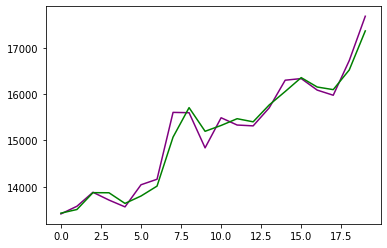

In [40]:
test_plt = test['Last'].reset_index().drop(columns='index')
plt.plot(test_plt, c='purple')
plt.plot(predict, c='g')

In [41]:
oSaver = tf.train.Saver()

oSess = oSession
oSaver.save(oSess, sModelPath)  #filename ends with .ckpt

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'Saver'